In [1]:
import pandas as pd
import numpy as np

**Exploratory Data Analysis**

In [2]:
test = pd.read_csv('https://raw.githubusercontent.com/gfan13/house-pricing/main/test.csv')
train = pd.read_csv('https://raw.githubusercontent.com/gfan13/house-pricing/main/train.csv')

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.head()

print("Type  of data: ", train.dtypes)
print("Shape of data: ", train.shape)

train.describe()

Type  of data:  Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
Shape of data:  (1460, 81)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
test.head()

print("Type  of data: ", type(test))
print("Shape of data: ", test.shape)

test.describe()

Type  of data:  <class 'pandas.core.frame.DataFrame'>
Shape of data:  (1459, 80)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
train_ID = train['Id']
test_ID = test['Id']

train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

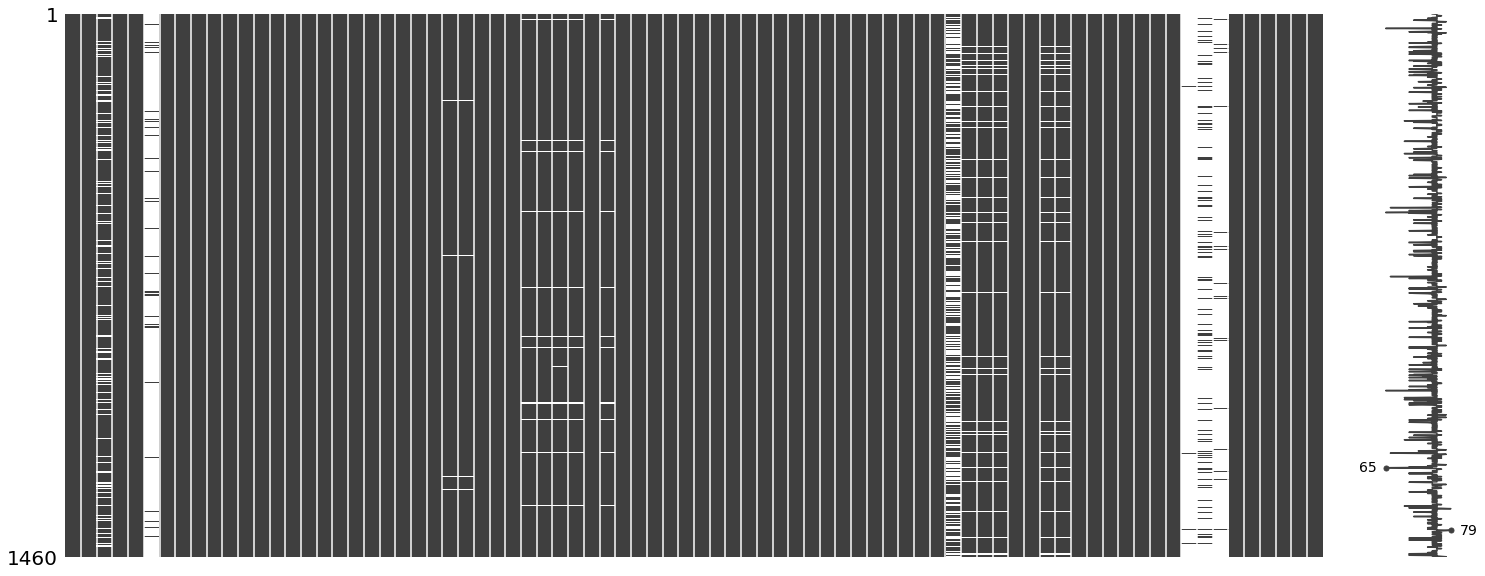

In [7]:
import missingno as msno
msno.matrix(train)


 mu = 180921.20 and sigma = 79415.29



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of SalesPrice')

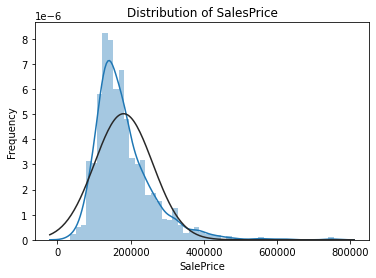

In [8]:
from scipy.stats import norm, skew
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train['SalePrice'] , fit=norm)

#Fitted parameters 
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Distribution plot 
plt.ylabel('Frequency')
plt.title('Distribution of SalesPrice')

In [9]:
#Gives statistical insight into data 
display(train.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


# Data Processing and Cleaning

## Log Transform Target Variable

In [10]:
# Log Transform Dependent Variable
train['SalePrice'] = np.log(train['SalePrice'] + 1)


 mu = 12.02 and sigma = 0.40



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Log SalesPrice')

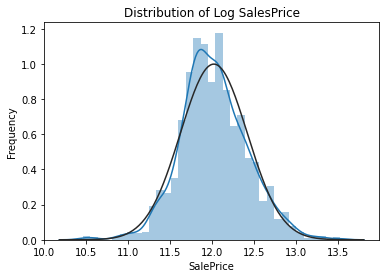

In [11]:
sns.distplot(train['SalePrice'] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.ylabel('Frequency')
plt.title('Distribution of Log SalesPrice')

## Remove Features with High Percentage of Null Values

In [12]:
# Drop all features with a lot of null data
def getPercentNullCount(df):
  df = df.copy()
  nan_values_series = df.isnull().sum().sort_values(ascending=False)
  nan_values_series = nan_values_series[nan_values_series > 0]
  return nan_values_series / len(df) * 100

getPercentNullCount(train)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageYrBlt      5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [13]:
#features dropped >17% missing observations 
train.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],inplace=True)

## Replace NaNs

In [14]:
#categorical features are filled with mode, whereas numerical features are filled with mean 
def fillNaNs(df):
  df = df.copy()
  for col in df.columns:
    if df[col].dtype == 'object':
      df[col] = df[col].fillna(df[col].mode()[0])
    else:
      df[col] = df[col].fillna(df[col].mean())
  return df
train = fillNaNs(train)

## One Hot Encoding

In [15]:
#categorical features as binary vectors 
def oneHotEncode(df):
  df = df.copy()
  categorical_columns = df.select_dtypes('object').columns
  noncategorical_data = df.drop(columns=categorical_columns)
  one_hot_encoded_data = pd.get_dummies(df[categorical_columns], columns = categorical_columns)
  one_hot_encoded_columns = one_hot_encoded_data.columns
  df = pd.concat([noncategorical_data,one_hot_encoded_data],axis=1)
  return df, one_hot_encoded_columns   

train, one_hot_columns = oneHotEncode(train)

In [16]:
train['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [17]:
train.isna().sum().sort_values(ascending=False)

SaleCondition_Partial    0
Neighborhood_Timber      0
Condition2_PosA          0
Condition2_Norm          0
Condition2_Feedr         0
                        ..
Foundation_BrkTil        0
ExterCond_TA             0
ExterCond_Po             0
ExterCond_Gd             0
MSSubClass               0
Length: 270, dtype: int64

## Select Features That Correlate Highest with Target Variable

In [18]:
plt.figure(figsize=(20,20))
correlation_with_target = train.corr()['SalePrice'].abs()
print(correlation_with_target)
features = correlation_with_target.sort_values(ascending=False).head(50).index
print(features)

MSSubClass               0.073959
LotArea                  0.257320
OverallQual              0.817185
OverallCond              0.036868
YearBuilt                0.586570
                           ...   
SaleCondition_AdjLand    0.064961
SaleCondition_Alloca     0.024985
SaleCondition_Family     0.045567
SaleCondition_Normal     0.101838
SaleCondition_Partial    0.324471
Name: SalePrice, Length: 270, dtype: float64
Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'ExterQual_TA', 'FullBath', 'YearBuilt',
       'GarageFinish_Unf', 'YearRemodAdd', 'BsmtQual_TA', 'KitchenQual_TA',
       'TotRmsAbvGrd', 'Foundation_PConc', 'ExterQual_Gd', 'GarageYrBlt',
       'Fireplaces', 'HeatingQC_Ex', 'BsmtQual_Ex', 'BsmtFinType1_GLQ',
       'MasVnrArea', 'GarageFinish_Fin', 'KitchenQual_Ex', 'KitchenQual_Gd',
       'GarageType_Detchd', 'MasVnrType_None', 'BsmtFinSF1', 'ExterQual_Ex',
       'Neighborhood_NridgHt', 'CentralAir_N', 'Centra

<Figure size 1440x1440 with 0 Axes>

In [19]:
#new dataset is created following dropped features and cleaned data 
train_new = train[features]
train_new.drop(columns='SalePrice',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
train_new

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,ExterQual_TA,FullBath,YearBuilt,GarageFinish_Unf,YearRemodAdd,BsmtQual_TA,KitchenQual_TA,TotRmsAbvGrd,Foundation_PConc,ExterQual_Gd,GarageYrBlt,Fireplaces,HeatingQC_Ex,BsmtQual_Ex,BsmtFinType1_GLQ,MasVnrArea,GarageFinish_Fin,KitchenQual_Ex,KitchenQual_Gd,GarageType_Detchd,MasVnrType_None,BsmtFinSF1,ExterQual_Ex,Neighborhood_NridgHt,CentralAir_N,CentralAir_Y,MSZoning_RM,Foundation_CBlock,Exterior2nd_VinylSd,Exterior1st_VinylSd,HeatingQC_TA,BsmtQual_Gd,WoodDeckSF,SaleType_New,SaleCondition_Partial,OpenPorchSF,2ndFlrSF,HalfBath,MasVnrType_Stone,BsmtExposure_No,Electrical_SBrkr,PavedDrive_Y,MSZoning_RL
0,7,1710,2,548,856,856,0,2,2003,0,2003,0,0,8,1,1,2003.0,0,1,0,1,196.0,0,0,1,0,0,706,0,0,0,1,0,0,1,1,0,1,0,0,0,61,854,1,0,1,1,1,1
1,6,1262,2,460,1262,1262,1,2,1976,0,1976,0,1,6,0,0,1976.0,1,1,0,0,0.0,0,0,0,0,1,978,0,0,0,1,0,1,0,0,0,1,298,0,0,0,0,0,0,0,1,1,1
2,7,1786,2,608,920,920,0,2,2001,0,2002,0,0,6,1,1,2001.0,1,1,0,1,162.0,0,0,1,0,0,486,0,0,0,1,0,0,1,1,0,1,0,0,0,42,866,1,0,0,1,1,1
3,7,1717,3,642,756,961,1,1,1915,1,1970,1,0,7,0,0,1998.0,1,0,0,0,0.0,0,0,1,1,1,216,0,0,0,1,0,0,0,0,0,0,0,0,0,35,756,0,0,1,1,1,1
4,8,2198,3,836,1145,1145,0,2,2000,0,2000,0,0,9,1,1,2000.0,1,1,0,1,350.0,0,0,1,0,0,655,0,0,0,1,0,0,1,1,0,1,192,0,0,84,1053,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,1,2,1999,0,2000,0,1,7,1,0,1999.0,1,1,0,0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,40,694,1,0,1,1,1,1
1456,6,2073,2,500,1542,2073,1,2,1978,1,1988,0,1,7,0,0,1978.0,2,0,0,0,119.0,0,0,0,0,0,790,0,0,0,1,0,1,0,0,1,1,349,0,0,0,0,0,1,1,1,1,1
1457,7,2340,1,252,1152,1188,0,2,1941,0,2006,1,0,9,0,0,1941.0,2,1,0,1,0.0,0,0,1,0,1,275,1,0,0,1,0,0,0,0,0,0,0,0,0,60,1152,0,0,1,1,1,1
1458,5,1078,1,240,1078,1078,1,1,1950,1,1996,1,0,5,0,0,1950.0,0,0,0,1,0.0,0,0,1,0,1,49,0,0,0,1,0,1,0,0,0,0,366,0,0,0,0,0,0,0,0,1,1


# Modeling

In [21]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from xgboost.sklearn import XGBRegressor
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
train_x, test_x, train_y, test_y = train_test_split(train_new, train['SalePrice'], train_size = .8, test_size = .2, random_state = 42)

In [23]:
#Linear Regression model
lr_model = LinearRegression()
lr_model.fit(train_x, train_y)

#Prediction for train
predict_train_y = lr_model.predict(train_x)
#Prediction for test
predict_test_y = lr_model.predict(test_x)

#correlation and RMSE
r2_lin_train = r2_score(train_y, predict_train_y)
print("R2 : {}".format(r2_lin_train))
r2_lin_test = r2_score(test_y, predict_test_y)
print("R2 : {}".format(r2_lin_test))

rmse_lin_train = np.sqrt(mean_squared_error(train_y, predict_train_y))
print("RMSE : {} ".format(rmse_lin_train))
rmse_lin_test = np.sqrt(mean_squared_error(test_y, predict_test_y))
print("RMSE : {} ".format(rmse_lin_test))

R2 : 0.8587465684818436
R2 : 0.8727618029898777
RMSE : 0.14674132724388564 
RMSE : 0.1540910306615698 


In [24]:
pd.options.display.precision = 3
pd.DataFrame({'Actual':np.exp(train_y.to_numpy()),'Predicted':np.exp(predict_train_y)})

,Actual,Predicted
0,145001.0,131108.615
1,178001.0,172048.924
2,85001.0,90711.858
3,175001.0,151691.656
4,127001.0,136283.380
...,...,...
1163,176433.0,175198.583
1164,135001.0,154370.164
1165,115001.0,121109.766
1166,189951.0,170471.556


In [25]:
np.sqrt( mean_squared_error( np.exp( train_y.to_numpy()) , np.exp(predict_train_y)) )

37966.08226649968

In [26]:
np.sqrt( mean_squared_error( np.exp( test_y.to_numpy()) , np.exp(predict_test_y)) )

28367.21107031277

In [27]:
np.exp(2-3)

0.36787944117144233

In [28]:
#Lasso
rr_model = Ridge(alpha = .01)
rr_model.fit(train_x, train_y)

#Prediction for train
predict_train_RR_y = rr_model.predict(train_x)
#Prediction for test
predict_test_RR_y = rr_model.predict(test_x)

#correlation and RMSE
r2_ridge_train = r2_score(train_y, predict_train_RR_y)
print("R2 : {}".format(r2_ridge_train))
r2_ridge_test = r2_score(test_y, predict_test_RR_y)
print("R2 : {}".format(r2_ridge_test))

rmse_ridge_train = np.sqrt(mean_squared_error(train_y, predict_train_RR_y))
print("RMSE : {} ".format(rmse_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(test_y, predict_test_RR_y))
print("RMSE : {} ".format(rmse_ridge_test))

R2 : 0.8587465599217066
R2 : 0.8727681617108016
RMSE : 0.1467413316902408 
RMSE : 0.15408718026866172 


In [29]:
#XGBoost
xg_model = xg.XGBRegressor(objective = 'reg:squarederror', n_estimators = 100, seed = 123)
xg_model.fit(train_x, train_y)

#Prediction for train
predict_train_XG_y = xg_model.predict(train_x)
#Prediction for test
predict_test_XG_y = xg_model.predict(test_x)

#correlation and RMSE
r2_xg_train = r2_score(train_y, predict_train_XG_y)
print("R2 : {}".format(r2_xg_train))
r2_xg_test = r2_score(test_y, predict_test_XG_y)
print("R2 : {}".format(r2_xg_test))

rmse_xg_train = np.sqrt(mean_squared_error(train_y, predict_train_XG_y))
print("RMSE : {} ".format(rmse_xg_train))
rmse_xg_test = np.sqrt(mean_squared_error(test_y, predict_test_XG_y))
print("RMSE : {} ".format(rmse_xg_test))

#XGBoost gives best performance of all models, with highest correlation and low RMSE 

R2 : 0.9366786618497446
R2 : 0.8829636773378695
RMSE : 0.09824896440074653 
RMSE : 0.147784518379988 
